### Preparing for submission to Kaggle Competition: https://www.kaggle.com/competitions/nlp-getting-started/data

We have to predict whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0. Binary classification NLP problem. 

##### 07 March 2023, https://rgjha.github.io 

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.metrics import precision_score,recall_score, confusion_matrix, accuracy_score, f1_score

##### We will need to check scores for different algorithms below, so define a function for later. 

In [25]:
def cal_scores(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy,f1,recall,precision

In [26]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [27]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [28]:
train_data = train_data.rename(columns={'text': 'Text', 'id': 'Id', 'target': 'Target'})
test_data = test_data.rename(columns={'text': 'Text', 'id': 'Id', 'target': 'Target'})

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   Text      7613 non-null   object
 4   Target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [30]:
#Removing two columns with missing values 
train_data = train_data.drop(columns=['keyword', 'location'])
test_data = test_data.drop(columns=['keyword', 'location'])
train_data.head()

,Id,Text,Target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
test_data.head(3)

,Id,Text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."


In [32]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    # It will discard all punctuations
    return text_nopunct

train_data['Text'] = train_data['Text'].apply(lambda x: remove_punct(x))
test_data['Text'] = test_data['Text'].apply(lambda x: remove_punct(x))
train_data.head()

,Id,Text,Target
0,1,Our Deeds are the Reason of this earthquake Ma...,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked to shelter in place are be...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent this photo from Ruby Alaska as s...,1


In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
# Stemming maps different forms of the same word to a common “stem” - for example, the English stemmer maps connection, connections, connective, connected, and connecting to connect. 
# So a searching for connected would also find documents which only have the other forms.
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
new_stop = ['http[^\s]*'] # You can add your own stopwords here!
stop.extend(new_stop)
# "   ".join(stop)

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
train_data['Text'] = train_data['Text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                  if word not in (stop)]))
test_data['Text'] = test_data['Text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                  if word not in (stop)]))
train_data.head()

,Id,Text,Target
0,1,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked shelter place notified off...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent photo Ruby Alaska smoke wildfire...,1


0    4342
1    3271
Name: Target, dtype: int64


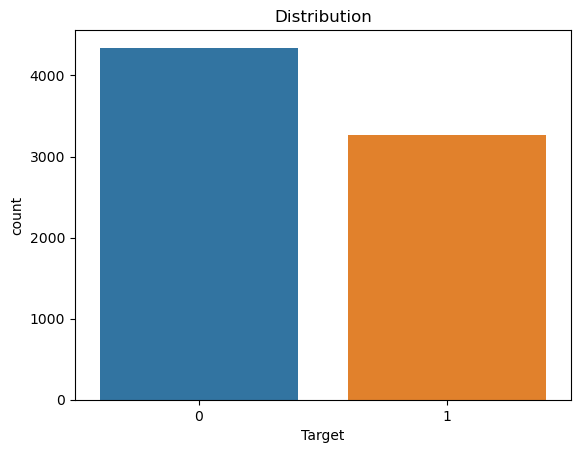

In [35]:
sns.countplot(x='Target', data=train_data)
plt.title('Distribution');
print(train_data['Target'].value_counts())

In [36]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

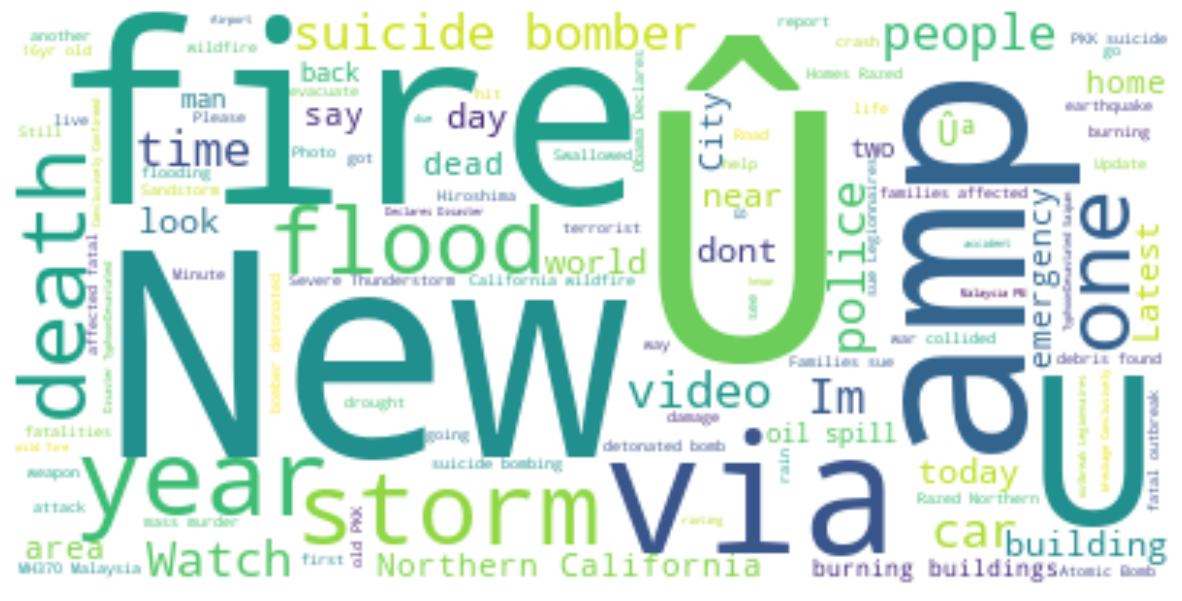

In [37]:
text = " ".join(i for i in train_data[train_data['Target']==1].Text)
stopwords = set(STOPWORDS)
stopwords = ["http[^\s]*", "co", "RT"] + list(stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Target']
X_test = vectorizer.transform(test_data['Text'])

### Now we train the model using some well-known algorithms starting with logistic regression. 

In [39]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Splitting train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_val = lr_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (LR):', val_accuracy)


Validation score (LR): 0.8004201680672269


In [40]:
# Tuning Logistic regression

from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(cv=5,max_iter =3000)
lr_cv.fit(X_train, y_train)
y_pred_val = lr_cv.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (LR):', val_accuracy)

Validation score (LR): 0.8082983193277311


#### Now check KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

test_sc = []
train_sc = [] 
neighbors = []

# Do a quick scan to see if there is much difference
for i in range (5, 12):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    neighbors.append(i)
    test_sc.append(knn_model.score(X_val, y_val))
    train_sc.append(knn_model.score(X_train, y_train))

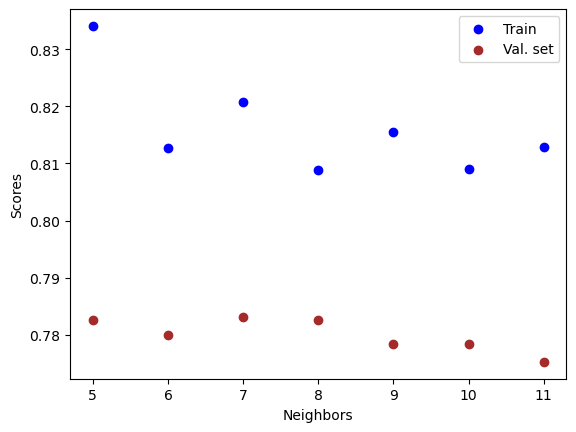

In [42]:
import matplotlib.pyplot as plt
plt.scatter(neighbors, train_sc, c = 'blue', label='Train')
plt.scatter(neighbors, test_sc, c = 'brown', label='Val. set')
plt.xlabel('Neighbors')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_pred_val = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (LR):', val_accuracy)


Validation score (LR): 0.782563025210084


##### Check Naive Bayes 

In [44]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train.toarray(), y_train)

y_pred_val = naive_model.predict(X_val.toarray())
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (NB):', val_accuracy)

Validation score (NB): 0.6292016806722689


##### Decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bg_model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg_model.fit(X_train, y_train)
y_pred_val = bg_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (DT):', val_accuracy)

Validation score (DT): 0.7725840336134454


### Best among these seems like SVC

In [46]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

y_pred_val = svc_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation score (SV):', val_accuracy)


Validation score (SV): 0.8051470588235294


In [47]:
# Now all models at once 
model_lists = [lr_model,lr_cv,knn_model,naive_model,bg_model,svc_model]

In [52]:
def comp_scores(model_lst):
    score_df = pd.DataFrame()
    for i,model in enumerate(model_lists):
        y_pred = model.predict(X_val.toarray())
        accu,f1,rec,prec= cal_scores(y_val,y_pred)
        score_df[i] = [accu,f1,rec,prec]
        #print ("Model working on now ->", model, score_df[i])
    return score_df

In [53]:
scores_df = comp_scores(model_lists)
# Rename columns
lab = {0:'Logistic regr.',1:'LR_cv',2:'KNN',3:'Naive Bayes',4:'Bagging Tree',5:'SVC'}
scores_df.rename(columns = lab,inplace = True)
# Rename to respective scores names
ind = {0:'Accuracy',1:'F1 Score',2:'Recall',3:'Precision'}
scores_df.rename(index = ind,inplace =True)
scores_df = scores_df.transpose()
scores_df = scores_df.reset_index()
scores_df

,index,Accuracy,F1 Score,Recall,Precision
0,Logistic regr.,0.800420,0.733146,0.642066,0.854337
1,LR_cv,0.808298,0.754539,0.690037,0.832344
2,KNN,0.782038,0.703360,0.605166,0.839590
3,Naive Bayes,0.629202,0.643434,0.783518,0.545844
4,Bagging Tree,0.772584,0.709201,0.649446,0.781065
5,SVC,0.805147,0.753488,0.697417,0.819364


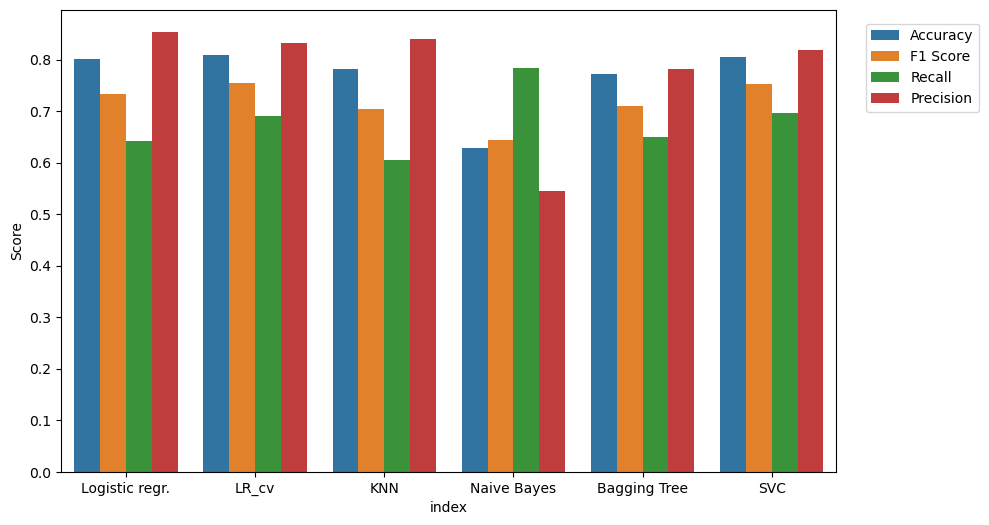

In [56]:
plt.figure(figsize=(10,6))

# Melt the DataFrame to create a "long" format
df_melted = pd.melt(scores_df, id_vars=['index'], var_name='Metric', value_name='Score')

# Make bar plot
sns.barplot(data=df_melted, x='index', y='Score', hue='Metric')

# Place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)

In [57]:
y_test = svc_model.predict(X_test)
# Choose model here to submit, selected last one
submission = pd.DataFrame({'Id': test_data['Id'], 'Target': y_test})
submission.to_csv('submission.csv', index=False)